On December 14, the National Review Online [tweeted](https://twitter.com/NRO/status/676516015078039556) the following chart plotting annual global temperature over time.

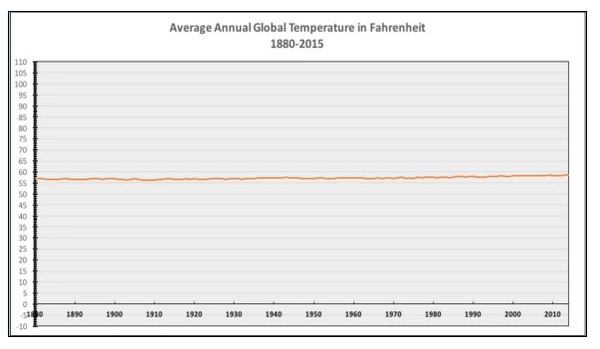

In [196]:
Image('https://pbs.twimg.com/media/CWN3D6nWUAUmQWW.png')

Of course blowing out the y-axis to show the temperature scale from 0-100 obscures the underlying trend, which shows a significant increase in average temperatures over the past century:

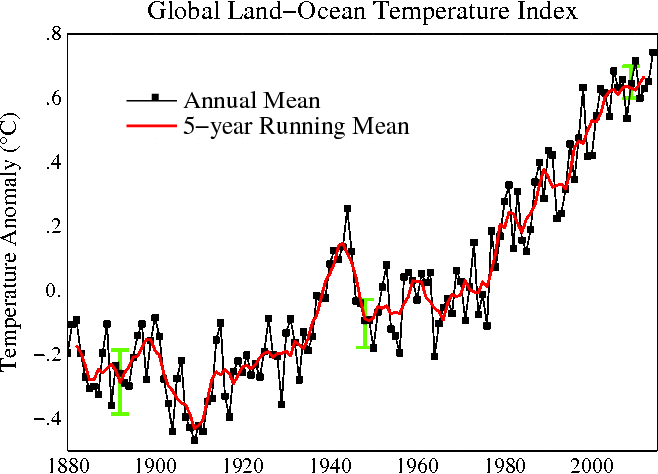

In [198]:
Image('http://i.imgur.com/kCYSat2.jpg')

But let's have some fun at the expense of NRO's inept data visualization choices.

Load data analysis packages and set options.

In [195]:
%matplotlib inline
import pandas as pd
import seaborn as sb
sb.set_style('whitegrid')
from IPython.display import Image

I'm using mortada's [fredapi](https://github.com/mortada/fredapi) wrapper to return nice data.

Install from command line: `pip install fredapi`

In [56]:
from fredapi import Fred

Get a [FredAPI](https://research.stlouisfed.org/docs/api/fred/) key [here](https://research.stlouisfed.org/docs/api/api_key.html).

In [5]:
fred = Fred(api_key='a13ab098ae56003c7d75423ac933f72e')

# Get economic data

Download some data from the API. Get the ticker names from the datasets described on [FRED's homepage](https://research.stlouisfed.org/fred2/).

In [70]:
unemployment = fred.get_series('UNEMPLOY')
gdp = fred.get_series('GDP')
debt = fred.get_series('GFDEBTN')
inflation = fred.get_series('CPIAUCSL')
treasury10 = fred.get_series('DGS10')
vix = fred.get_series('VIXCLS')
wilshire = fred.get_series('WILL5000INDFC')

### Unemployment

Unemployment has been flat for decades. Great job everyone!

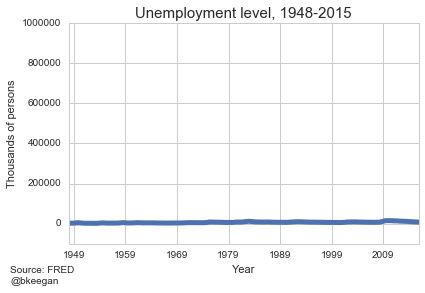

In [233]:
ax = unemployment.plot(lw=5)
ax.set_ylim(-1e5,1e6)
ax.set_xlabel('Year')
ax.set_ylabel('Thousands of persons')
ax.set_title('Unemployment level, 1948-2015',fontsize=15)
ax.text(-400,-3e5,'Source: FRED\n@bkeegan')
plt.tight_layout()
plt.savefig('unemployment.png',dpi=150,bbox_inches='tight')

### GDP

Unfortunately, US GDP hasn't grown despite constant employment levels.

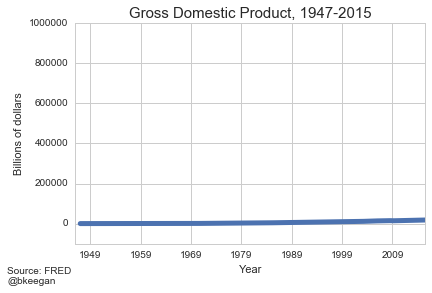

In [232]:
ax = gdp.plot(lw=5)
ax.set_ylim(-1e5,1e6)
ax.set_xlabel('Year')
ax.set_ylabel('Billions of dollars')
ax.set_title('Gross Domestic Product, 1947-2015',fontsize=15)
ax.text(-150,-3e5,'Source: FRED\n@bkeegan')
plt.tight_layout()
plt.savefig('gdp.png',dpi=150,bbox_inches='tight')

### Public debt


But this chart *proves* that the federal debt isn't actually growing.

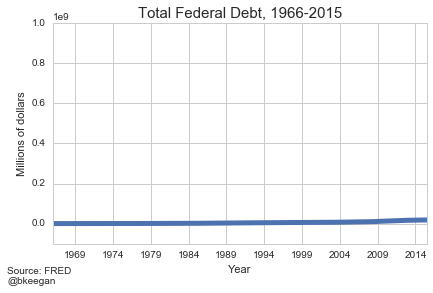

In [231]:
ax = debt.plot(lw=5)
ax.set_ylim(-1e8,1e9)
ax.set_xlabel('Year')
ax.set_ylabel('Millions of dollars')
ax.set_title('Total Federal Debt, 1966-2015',fontsize=15)
ax.text(-40,-3e8,'Source: FRED\n@bkeegan')
plt.tight_layout()
plt.savefig('debt.png',dpi=150,bbox_inches='tight')

### Inflation

It's remarkable how consistent inflation has been over this whole timeframe.

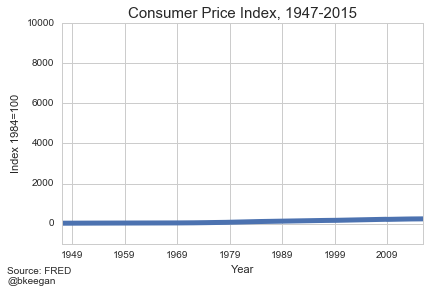

In [230]:
ax = inflation.plot(lw=5)
ax.set_ylim(-1000,10000)
ax.set_xlabel('Year')
ax.set_ylabel('Index 1984=100')
ax.set_title('Consumer Price Index, 1947-2015',fontsize=15)
ax.text(-400,-3e3,'Source: FRED\n@bkeegan')
plt.tight_layout()
plt.savefig('cpi.png',dpi=150,bbox_inches='tight')

### 10-year Treasury

Treasury yields are very stable as one would expect.

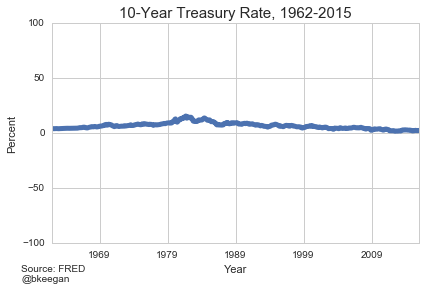

In [229]:
ax = treasury10.resample('M').plot(lw=5)
ax.set_ylim(-100,100)
ax.set_xlabel('Year')
ax.set_ylabel('Percent')
ax.set_title('10-Year Treasury Rate, 1962-2015',fontsize=15)
ax.text(-150,-135,'Source: FRED\n@bkeegan')
plt.tight_layout()
plt.savefig('treasury10.png',dpi=150,bbox_inches='tight')

### VIX

Market volatility is rare and minor.

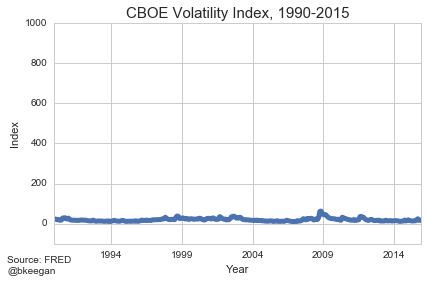

In [228]:
ax = vix.resample('M').plot(lw=5)
ax.set_ylim(-100,1000)
ax.set_xlabel('Year')
ax.set_ylabel('Index')
ax.set_title('CBOE Volatility Index, 1990-2015',fontsize=15)
ax.text(200,-250,'Source: FRED\n@bkeegan')
plt.tight_layout()
plt.savefig('vix.png',dpi=150,bbox_inches='tight')

### Wilshire 5000 index

Equity prices are generally stable with consistent growth.

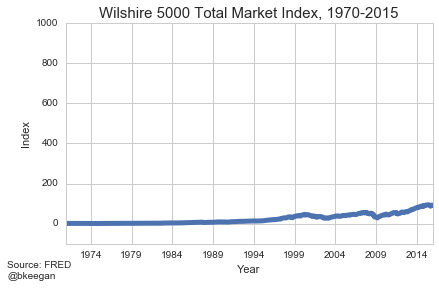

In [227]:
ax = wilshire.resample('M').dropna().plot(lw=5)
ax.set_ylim(-100,1000)
ax.set_xlabel('Year')
ax.set_ylabel('Index')
ax.set_title('Wilshire 5000 Total Market Index, 1970-2015',fontsize=15)
ax.text(-75,-275,'Source: FRED\n@bkeegan')
plt.tight_layout()
plt.savefig('wilshire5000.png',dpi=150,bbox_inches='tight')